In [0]:
#importing keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, Input, SpatialDropout1D
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [0]:
# DataFrame
import pandas as pd
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
#numpy
import numpy as np
#utility
import re
import matplotlib.pyplot as plt

In [0]:
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [83]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Load Dataset
train_data = pd.read_csv("gdrive/My Drive/abuse_new/tweets_train_same.csv")

In [0]:
validate_data = pd.read_csv("gdrive/My Drive/abuse_new/tweets_validate_same.csv")

In [0]:
#Load Dataset
test_data = pd.read_csv("gdrive/My Drive/abuse_new/tweets_test.csv",)

In [0]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [91]:
train_data.shape, test_data.shape

((7938, 17), (2190, 17))

In [92]:
train_data["label"].value_counts()

0.0    4305
1.0    3632
Name: label, dtype: int64

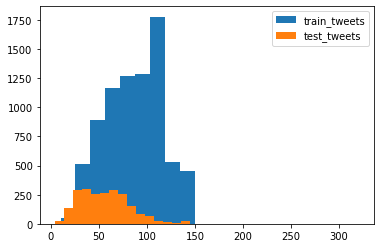

In [93]:
length_train = train_data['text'].str.len()
length_test = test_data['text'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [94]:
combined_data = train_data.append(test_data, ignore_index=True)
combined_data.shape

(10128, 17)

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [98]:
combined_data['clean_tweet'] = np.vectorize(remove_pattern)(combined_data['text'], "@[\w]*") 

combined_data.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,label,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tidy_tweet
0,1.868981e+09,ryanmaxwell_1,1458671502000,2016-03-22 18:31:42,NaN,NaN,NaN,0.0,#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?
1,2.571870e+09,detroitdailynew,1476133020000,2016-10-10 20:57:00,0.0,False,0.0,1.0,"Clinton: Trump should’ve apologized more, attacked less https://t.co/eJampkoHFZ",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow"">twitterfeed</a>",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN,"Clinton: Trump should’ve apologized more, attacked less https://t.co/eJampkoHFZ"
2,1.710805e+09,cookncooks,1487767423000,2017-02-22 12:43:43,NaN,NaN,NaN,0.0,RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet),8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN,RT : Who was/is the best president of the past 25 years? (Vote &amp; Retweet)
3,2.584153e+09,queenofthewo,1482764801000,2016-12-26 15:06:41,NaN,NaN,NaN,1.0,RT @jww372: I don't have to guess your religion! #ChristmasAftermath,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN,RT : I don't have to guess your religion! #ChristmasAftermath
4,1.768260e+09,mrclydepratt,1501986984000,2017-08-06 02:36:24,NaN,NaN,NaN,0.0,RT @Shareblue: Pence and his lawyers decided which of his official emails the public could see\r\n\r\nhttps://t.co/HjhPguBK1Y by @alisonrose711,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN,RT : Pence and his lawyers decided which of his official emails the public could see\r\n\r\nhttps://t.co/HjhPguBK1Y by


In [99]:
combined_data['clean_tweet'] = combined_data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
combined_data.head(10)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,label,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tidy_tweet
0,1.868981e+09,ryanmaxwell_1,1458671502000,2016-03-22 18:31:42,NaN,NaN,NaN,0.0,#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in
1,2.571870e+09,detroitdailynew,1476133020000,2016-10-10 20:57:00,0.0,False,0.0,1.0,"Clinton: Trump should’ve apologized more, attacked less https://t.co/eJampkoHFZ",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow"">twitterfeed</a>",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN,Clinton Trump should ve apologized more attacked less https t co eJampkoHFZ
2,1.710805e+09,cookncooks,1487767423000,2017-02-22 12:43:43,NaN,NaN,NaN,0.0,RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet),8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN,RT Who was is the best president of the past years Vote amp Retweet
3,2.584153e+09,queenofthewo,1482764801000,2016-12-26 15:06:41,NaN,NaN,NaN,1.0,RT @jww372: I don't have to guess your religion! #ChristmasAftermath,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN,RT I don t have to guess your religion #ChristmasAftermath
4,1.768260e+09,mrclydepratt,1501986984000,2017-08-06 02:36:24,NaN,NaN,NaN,0.0,RT @Shareblue: Pence and his lawyers decided which of his official emails the public could see\r\n\r\nhttps://t.co/HjhPguBK1Y by @alisonrose711,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN,RT Pence and his lawyers decided which of his official emails the public could see https t co HjhPguBK Y by
5,2.882014e+09,giselleevns,1477496038000,2016-10-26 15:33:58,NaN,NaN,NaN,0.0,"@ModicaGiunta me, too!",7.913019e+17,NaN,[],[],POSTED,[],NaN,NaN,me too
6,1.658421e+09,baobaeham,1488910304000,2017-03-07 18:11:44,NaN,NaN,NaN,1.0,RT @MDBlanchfield: You’ll never guess who tweeted something false that he saw on TV - The Washington Post https://t.co/K2e4XdXRfu,8.391768e+17,NaN,[],[],POSTED,[],NaN,NaN,RT You ll never guess who tweeted something false that he saw on TV The Washington Post https t co K e XdXRfu
7,2.587101e+09,judelambertusa,1483102170000,2016-12-30 12:49:30,NaN,NaN,NaN,1.0,RT @100PercFEDUP: New post: WATCH: DIAMOND AND SILK Rip On John Kerry Over Israel Comments (VIDEO) https://t.co/NkdKaQ9yYu,8.148157e+17,NaN,[],[],POSTED,[],NaN,NaN,RT New post WATCH DIAMOND AND SILK Rip On John Kerry Over Israel Comments VIDEO https t co NkdKaQ yYu
8,1.679279e+09,ameliebaldwin,1477792099000,2016-10-30 01:48:19,0.0,False,0.0,0.0,RT @AriaWilsonGOP: 3 Women Face Charges After Being Caught Stealing Dozens Of Trump Signs https://t.co/JjlZxaW3JN https://t.co/qW2Ok9ROxH,7.925436e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",[],"[""http://www.Feed24hNews.com/4MzaL""]",POSTED,"[""ariawilsongop""]",7.925391e+17,NaN,RT Women Face Charges After Being Caught Stealing Dozens Of Trump Signs https t co JjlZxaW JN https t co qW Ok ROxH
9,1.649488e+09,hiimkhloe,1458155259000,2016-03-16 19:07:39,NaN,NaN,NaN,1.0,One of the ways to remind that #BlackLivesMatter #BlackPressDay,7.101807e+17,NaN,"[""Blacklivesmatter""]",[],POSTED,[],NaN,NaN,One of the ways to remind that #BlackLivesMatter #BlackPressDay


In [0]:
combined_data['clean_tweet'] = combined_data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>4]))

In [101]:
combined_data.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,label,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tidy_tweet
0,1.868981e+09,ryanmaxwell_1,1458671502000,2016-03-22 18:31:42,NaN,NaN,NaN,0.0,#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,#IslamKills trying there terrorist attacks Europe before refugees
1,2.571870e+09,detroitdailynew,1476133020000,2016-10-10 20:57:00,0.0,False,0.0,1.0,"Clinton: Trump should’ve apologized more, attacked less https://t.co/eJampkoHFZ",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow"">twitterfeed</a>",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN,Clinton Trump should apologized attacked https eJampkoHFZ
2,1.710805e+09,cookncooks,1487767423000,2017-02-22 12:43:43,NaN,NaN,NaN,0.0,RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet),8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN,president years Retweet
3,2.584153e+09,queenofthewo,1482764801000,2016-12-26 15:06:41,NaN,NaN,NaN,1.0,RT @jww372: I don't have to guess your religion! #ChristmasAftermath,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN,guess religion #ChristmasAftermath
4,1.768260e+09,mrclydepratt,1501986984000,2017-08-06 02:36:24,NaN,NaN,NaN,0.0,RT @Shareblue: Pence and his lawyers decided which of his official emails the public could see\r\n\r\nhttps://t.co/HjhPguBK1Y by @alisonrose711,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN,Pence lawyers decided which official emails public could https HjhPguBK


In [0]:
tokenized_tweet = combined_data['clean_tweet'].apply(lambda x: x.split()) # tokenizing

In [103]:
tokenized_tweet.head()

0            [#IslamKills, trying, there, terrorist, attacks, Europe, before, refugees]
1                     [Clinton, Trump, should, apologized, attacked, https, eJampkoHFZ]
2                                                           [president, years, Retweet]
3                                                [guess, religion, #ChristmasAftermath]
4    [Pence, lawyers, decided, which, official, emails, public, could, https, HjhPguBK]
Name: tidy_tweet, dtype: object

In [0]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [105]:
tokenized_tweet.head()

0              [#islamkil, tri, there, terrorist, attack, europ, befor, refuge]
1                    [clinton, trump, should, apolog, attack, http, ejampkohfz]
2                                                       [presid, year, retweet]
3                                        [guess, religion, #christmasaftermath]
4    [penc, lawyer, decid, which, offici, email, public, could, http, hjhpgubk]
Name: tidy_tweet, dtype: object

In [0]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combined_data['clean_tweet'] = tokenized_tweet

In [0]:
train_data['clean_tweet'] = combined_data['clean_tweet']

In [108]:
train_data.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,label,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tidy_tweet
0,1.868981e+09,ryanmaxwell_1,1458671502000,2016-03-22 18:31:42,NaN,NaN,NaN,0.0,#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,#islamkil tri there terrorist attack europ befor refuge
1,2.571870e+09,detroitdailynew,1476133020000,2016-10-10 20:57:00,0.0,False,0.0,1.0,"Clinton: Trump should’ve apologized more, attacked less https://t.co/eJampkoHFZ",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow"">twitterfeed</a>",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN,clinton trump should apolog attack http ejampkohfz
2,1.710805e+09,cookncooks,1487767423000,2017-02-22 12:43:43,NaN,NaN,NaN,0.0,RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet),8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN,presid year retweet
3,2.584153e+09,queenofthewo,1482764801000,2016-12-26 15:06:41,NaN,NaN,NaN,1.0,RT @jww372: I don't have to guess your religion! #ChristmasAftermath,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN,guess religion #christmasaftermath
4,1.768260e+09,mrclydepratt,1501986984000,2017-08-06 02:36:24,NaN,NaN,NaN,0.0,RT @Shareblue: Pence and his lawyers decided which of his official emails the public could see\r\n\r\nhttps://t.co/HjhPguBK1Y by @alisonrose711,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN,penc lawyer decid which offici email public could http hjhpgubk


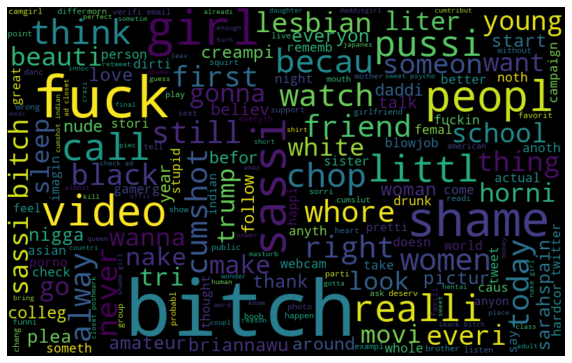

In [109]:
all_words = ' '.join([text for text in train_data['clean_tweet']])

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        #ht = re.findall(r"#(\w+)", i)
        if( len(i) != 0) :
          hashtags.append(i)
          #hashtags = hashtags + str(i)
    outlst = [x for x in hashtags if x != '[]']
    #outlst = [x for x in hashtags]
    print (outlst)
    return outlst

In [111]:
HT_regular = hashtag_extract(train_data['hashtags'][train_data['label'] == 0])

['["IslamKills"]', '["My2017BiggestHope"]', '["Friyay"]', '["mutual"]', '["SearchesGoogleIsAshamedOf"]', '["OneLetterOffSports"]', '["God"]', '["KSHBC"]', '["SuperBowl"]', '["Armageddon","Armageddon"]', '["ToDoListBeforeChristmas"]', '["2017trendsreport"]', '["ValentinesDayIn3Words"]', '["HateToEatAndRun"]', '["EDQ"]', '["RT"]', '["Cleveland","Politics"]', '["Iamonfire"]', '["Linksextremismus"]', '["ThankACop"]', '["Staywoke"]', '["RejectedDebateTopics"]', '["CatTV"]', '["afd"]', '["bitcoin"]', '["Hollande"]', '["MyDreamPresidentIs"]', '["NoCyberCensorship"]', '["IGetDepressedWhen"]', '["WhatIWouldTellA15YearOldMe"]', '["CarSongsOrBand"]', '["IAmThankfulFor"]', '["Freitagmorgen"]', '["Prayers4California"]', '["ToAvoidWorkI"]', '["tcot"]', '["GoodNight"]', '["GiftIdeasForPoliticians"]', '["ElectionDay","TrumpPence16"]', '["Politics"]', '["WorstPainEverIn3Words"]', '["local"]', '["IGetDepressedWhen"]', '["ThingsMoreTrustedThanHillary"]', '["2016isaJoke"]', '["IGetDepressedWhen"]', '["sea

In [112]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(train_data['hashtags'][train_data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train_data['hashtags'][train_data['label'] == 1])

#HT_regular = [x.replace('[','') for x in HT_regular]
#HT_regular = list(HT_regular)
print ( HT_regular )
# unnesting list
#HT_regular = sum(HT_regular,[])
#HT_negative = sum(HT_negative,[])

['["IslamKills"]', '["My2017BiggestHope"]', '["Friyay"]', '["mutual"]', '["SearchesGoogleIsAshamedOf"]', '["OneLetterOffSports"]', '["God"]', '["KSHBC"]', '["SuperBowl"]', '["Armageddon","Armageddon"]', '["ToDoListBeforeChristmas"]', '["2017trendsreport"]', '["ValentinesDayIn3Words"]', '["HateToEatAndRun"]', '["EDQ"]', '["RT"]', '["Cleveland","Politics"]', '["Iamonfire"]', '["Linksextremismus"]', '["ThankACop"]', '["Staywoke"]', '["RejectedDebateTopics"]', '["CatTV"]', '["afd"]', '["bitcoin"]', '["Hollande"]', '["MyDreamPresidentIs"]', '["NoCyberCensorship"]', '["IGetDepressedWhen"]', '["WhatIWouldTellA15YearOldMe"]', '["CarSongsOrBand"]', '["IAmThankfulFor"]', '["Freitagmorgen"]', '["Prayers4California"]', '["ToAvoidWorkI"]', '["tcot"]', '["GoodNight"]', '["GiftIdeasForPoliticians"]', '["ElectionDay","TrumpPence16"]', '["Politics"]', '["WorstPainEverIn3Words"]', '["local"]', '["IGetDepressedWhen"]', '["ThingsMoreTrustedThanHillary"]', '["2016isaJoke"]', '["IGetDepressedWhen"]', '["sea

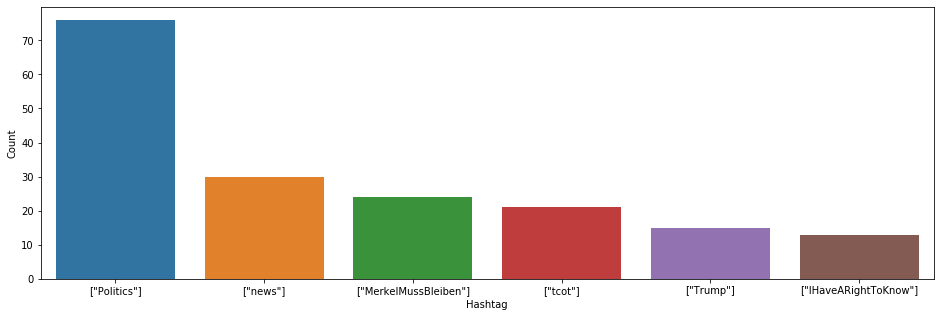

In [113]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 6) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

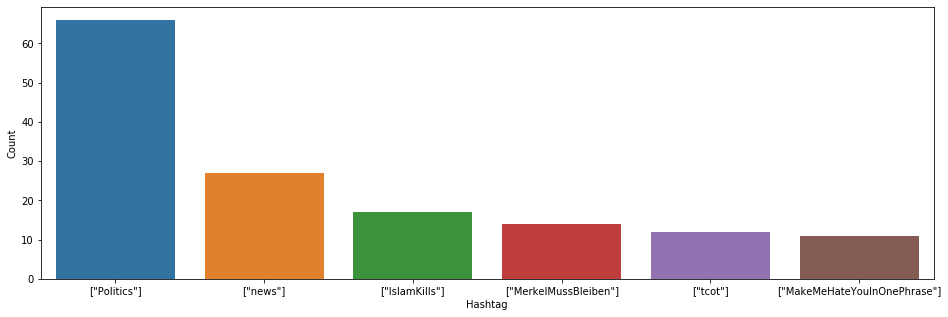

In [114]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 6)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [115]:
# Basic library loading
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [116]:
tokenizer = Tokenizer(num_words=None, split=' ')
tokenizer.fit_on_texts(train_data['clean_tweet'].values)
x = tokenizer.texts_to_sequences(train_data['clean_tweet'].values)
x = pad_sequences(x, maxlen=20, padding='post')
print(x[54])

[5546   45 2253   16 5547    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]


In [117]:
y = tokenizer.texts_to_sequences(validate_data['text'].values)
y = pad_sequences(y, maxlen=20, padding='post')
print(y[3])

[114   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


In [0]:
from sklearn.model_selection import train_test_split
x_test = train_data.iloc[:,7].values
y_test=validate_data.iloc[:,7].values

In [0]:
batch_size = 16
epochs = 5

In [120]:
model = Sequential()
model.add(Embedding(20960, 256))
model.add(LSTM(32, dropout=0.4, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 256)         5365760   
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                36992     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 5,402,785
Trainable params: 5,402,785
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Train on 7938 samples, validate on 7938 samples
Epoch 1/5
7938/7938 [==============================] - 36s 5ms/step - loss: nan - acc: 0.6390 - val_loss: 6.4971 - val_acc: 0.5925
Epoch 2/5
7938/7938 [==============================] - 31s 4ms/step - loss: nan - acc: 0.4574 - val_loss: 6.4971 - val_acc: 0.5925
Epoch 3/5
7938/7938 [==============================] - 29s 4ms/step - loss: nan - acc: 0.4574 - val_loss: 6.4971 - val_acc: 0.5925
Epoch 4/5
7938/7938 [==============================] - 30s 4ms/step - loss: nan - acc: 0.4573 - val_loss: 6.4971 - val_acc: 0.5925
Epoch 5/5
7938/7938 [==============================] - 30s 4ms/step - loss: nan - acc: 0.4573 - val_loss: 6.4971 - val_acc: 0.5925


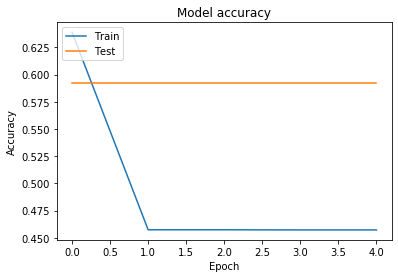

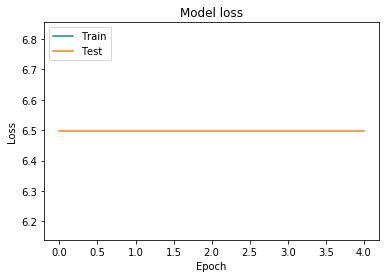

In [122]:
history=model.fit(x, x_test,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(y, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#Reference : https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

'''from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
X, Y = train_test_split(df, test_size=0.3, random_state=1)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
tokenizer = Tokenizer(num_words=None, split=' ')
tokenizer.fit_on_texts(X['text'].values)
x = tokenizer.texts_to_sequences(X['text'].values)
x = pad_sequences(x, maxlen=20, padding='post')
x_test = X.iloc[:,7].values
cvscores = []

for train, test in kfold.split(x,x_test):
  # create model
  model = Sequential()
  model.add(Embedding(20960, 256))
  model.add(LSTM(32, dropout=0.4, recurrent_dropout=0.1))
  model.add(Dense(1, activation='sigmoid'))  
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
  model.fit(x, x_test, epochs=150, batch_size=10, verbose=0)
	# evaluate the model
  scores = model.evaluate(x, x_test, verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores))) '''

In [0]:
score= model.evaluate(y, y_test, verbose = 2)
print("Loss: %.2f" % score[0])
print("Accuracy: %.2f" % score[1])

Loss: 6.48
Accuracy: 0.59


In [0]:
prediction = model.predict(x)

In [0]:
from sklearn.metrics import confusion_matrix
prediction = model.predict(x)
prediction = np.argmax(prediction,axis = 1) 
y_true = np.argmax(y_test)

In [127]:
print('Prediction value:', prediction[329])

Prediction value: 0


In [0]:
z = tokenizer.texts_to_sequences(test_data['text'].values)
z = pad_sequences(z, maxlen=22, padding='post')

In [129]:
pred=model.predict(z)
print('Prediction value:', pred[42])

Prediction value: [1.]


In [0]:
for i in range(len(pred)):
    test_data.at[i,'label']=int(0)
    if pred[i,0]>=0.4:
        test_data.at[i,'lable']=1
    

In [0]:
import sklearn.metrics as metrics

In [133]:

print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58      3235
           1       0.00      0.00      0.00      4703

    accuracy                           0.41      7938
   macro avg       0.20      0.50      0.29      7938
weighted avg       0.17      0.41      0.24      7938



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
test_data.to_csv('gdrive/My Drive/abuse_new/result.csv')

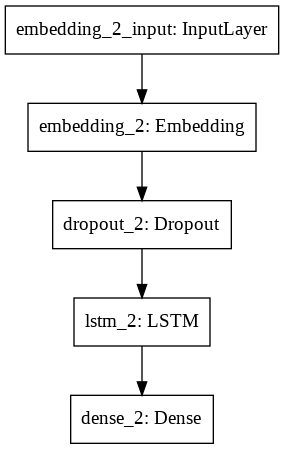

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')